# i. Perkenalan

==================================================================================

Nama        : Nurdin Atid H

Datasets    : [Employee Future Prediction]('https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction')

===================================================================================

#### Pernyataan Masalah :
Perkembangan suatu perusahaan tidak terlepas dari peran seluruh pegawai maka dari itu menjaga karyawan untuk tetap bekerja di perusaahaan menjadi prioritas namun pada kenyataannya tidak sedikit karyawan yang memutuskan untuk berhenti bekerja sehingga dibutuhkan langkah untuk memprediksi karyawan mana yang cenderung untuk berhenti bekerja, difokuskan pada prediksi karyawan yang akan berhenti untuk menghindari ketika karyawan di prediksi tetap bekerja tetapi ternyata malah berhenti dari pekerjaan, untuk kemudian di lakukan langkah pencegahan atau mempersiapkan karyawan baru untuk mengisi posisi karyawan yang akan berhenti.

#### Tujuan : 
Tujuan utama adalah mengembangkan model prediksi yang akurat untuk mengidentifikasi apakah karyawan akan memutuskan berhenti atau tidak.

#### Penjabaran Masalah : 
- Perlu diidentifikasi variabel-variabel yang dapat mempengaruhi karyawan dalam memutuskan berhenti atau tidak.
- Perusahaan perlu mengembangkan model prediksi yang dapat mengestimasi karyawan yang akan memutuskan untuk berhenti atau tetap bekerja di perusahaan sehingga dapat dilakukan pencegahan atau mempersiapkan karyawan pengganti.
- Mengidentifikasi model klasifikasi terbaik di antara  termasuk Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, K-Nearest Neighbors, Gaussian Naive Bayes, dan AdaBoost, untuk memprediksi karyawan yang memutuskan keluar atau tetap bekerja di prusahaan..

#### Solusi yang Dilakukan :
Untuk menyelesaikan penjabaran masalah ini, kami akan menggunakan : 
- Model terbaik dengan membandingkan  Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, K-Nearest Neighbors, Gaussian Naive Bayes, dan AdaBoost.
- Metrics evaluasi yang digunakan dalam konteks adalah recall

# ii. Import Libraries

In [1]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import pickle
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt

# import FE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# import model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

# Check Performance Model against Train-Set
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Mengimpor Model Evaluation
from sklearn.metrics import confusion_matrix

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# column transformernya
from sklearn.compose import ColumnTransformer



# iii. Data Loading



Pada bagian ini kita akan menampilkan data dari csv lalu mengcopy data tersebut agar data asli tidak berubah.

In [2]:
# Load dataset
#import data yang sudah di download dari kaggle|com
df = pd.read_csv('Employee.csv')

# Duplicate data ori
df_1 = df.copy()


Menampilkan 10 data paling atas

In [3]:
# tampilkan sepuluh data paling atas
df_1.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


Menampilkan 10 data paling bawah

In [4]:
# tampilkan sepuluh data paling bawah
df.tail(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4643,Bachelors,2013,Bangalore,3,31,Female,No,5,0
4644,Bachelors,2015,Pune,3,32,Female,Yes,1,1
4645,Masters,2017,Pune,2,31,Female,No,2,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [5]:
# tampilkan data info
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


- Data terdiri dari 9 kolom.
- Bertipe Integer(5) 10 kolom , Object 4 kolom.
- Memiliki 4.653 baris

Dengan rincian kolom sebagai berikut : 

column |	description |
---------|--------------|
Education|	EDUCATION LEVEL  |
JoiningYear	| YEAR OF JOINING COMPANY |
City	| CITY OFFICE WHERE POSTED |
PaymentTier	| PAYMENT TIER: 1: HIGHEST 2: MID LEVEL 3:LOWEST |
Age|	CURRENT AGE |
Gender	| GENDER OF EMPLOYEE |
EverBenched 	| EVER KEPT OUT OF PROJECTS FOR 1 MONTH OR MORE |
ExperienceInCurrentDomain  	 | EXPERIENCE IN CURRENT FIELD |
LeaveOrNot                 	| WHETHER EMPLOYEE LEAVES THE COMPANY IN NEXT 2 YEARS (Leave = 1, not = 0)



### Cek data duplikat

In [6]:
# Tampilkan duplikat data
df_1.duplicated().sum()

1889

Terdapat data duplikat sebanyak 1.889 data.

Dengan mempertimbangkan banyak data yang kita miliki 4,653 dan jumlah duplikat sebanyak 1.889 untuk itu diputuskan untuk melakukan drop pada data duplicate

In [7]:
# drop duplikat data
df_1 = df_1.drop_duplicates()

Tampilkan apakah masih ada duplikat atau tidak

In [8]:
# Tampilkan duplikat data
df_1.duplicated().sum()

0

Sudah tidak ada data duplikat

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB


Setelah dilakukan drop pada data duplikat maka data yang kita gunakan adalah
- Data terdiri dari 9 kolom.
- Bertipe Integer(5) 10 kolom , Object 4 kolom.
- Memiliki 2.764 baris


kita simpan data yang bersih untuk kemudian di gunakan dalam presentasi :

In [10]:
#simpan data dalam bentuk csv
df_1.to_csv('employee_clear.csv', index=False)

In [11]:
# tampilkan data describe
df_1.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Dari pengolahan describe diatas, dapat disimpulkan bahwa :

- Rata-rata karyawan mulai  bekerja di perusahaan pada tahun 2015

- Karyawan yang paling terakhir masuk kerja pada tahun 2018

- karyawan paling lama bekerja dari tahun 2012


jika mean dan median(50%) dari kolom tahun itu mirip angkanya, kemungkinan besar normal distribution dan jika jauh maka termasuk skew distribution. Dari data diatas hasinya menentukan bahwa datanya termasuk skew distribution.

# iv. Exploratory Data Analysis (EDA)
Bagian ini berisi ekplorasi data pada dataset dengan menggunakan query, grouping, visualisasi sederhana, 
Informasi yang ingin kita dapatkan disini adalah :
- persebaran data dilihat dari karyawan yang berhenti dan tetap bekerja di perusahaan,
- persebaran tempat tinggal karyawan
- pendidikan terakhri karyawan
- tahun dimana karyawan mulai bekerja di perusahaan
- payment tier dari karyawan
- jumlah karyawan dilihat dari gender


Text(0.5, 1.0, 'City vc Age')

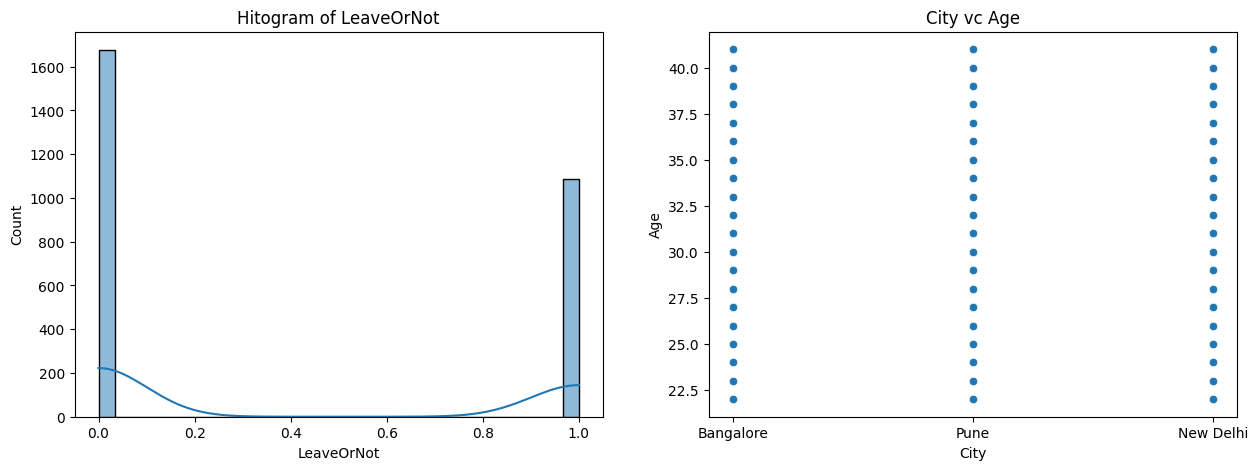

In [12]:
# membuat kanvas
plt.figure(figsize=(15,5))  

# membuat grafik
# Plot 1 taruh dikiri
plt.subplot(1, 2, 1)       
sns.histplot(df_1['LeaveOrNot'],kde=True, bins=30)   
plt.title('Hitogram of LeaveOrNot')

# Plot 1 taruh dikanan
plt.subplot(1, 2, 2)     #untuk bikin kolom 2
sns.scatterplot(x='City',y='Age',data=df_1)  #untuk bikin grafik
plt.title('City vc Age')

Terlihat dari data di atas kecenderungan pegawai tetap bekerja walau tingkat berhenti karyawan pun besar, terilihat persebaran data antara city dan age persebarannya merata.

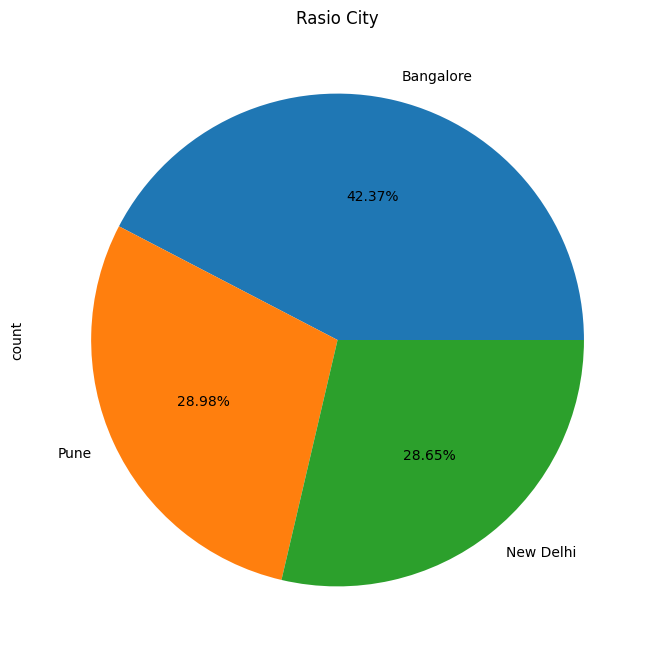

In [13]:
# Membuat Pie Chart
fig,ax1 = plt.subplots(figsize=(8,8))

df_1['City'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.title('Rasio City')
plt.show()

Dari pie chart di atas terlihat persebaran kota tempat asal karyawan :
- 42.37 % karyawan berasal dari Bangalore
- 28.98 % karyawan berasal dari Pune
- 28.65 % karyawan berasal dari New Delhi

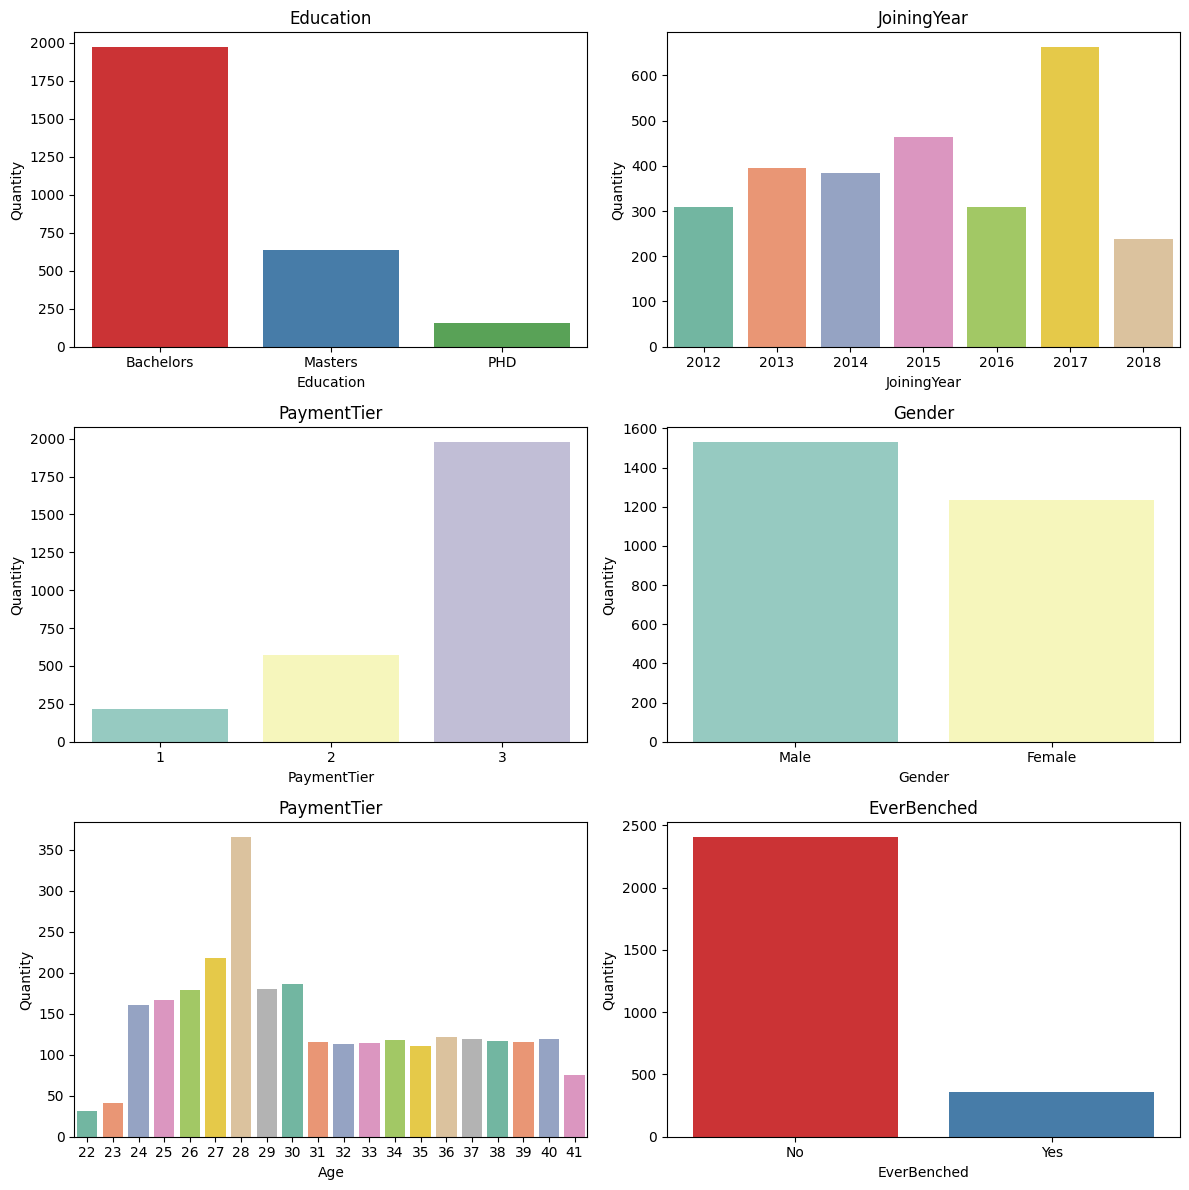

In [14]:

# Buat subplot dengan 3 baris dan 2 kolom
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Palet warna yang berbeda untuk setiap grafik
palettes = ["Set1", "Set2", "Set3", "Set3", "Set2", "Set1"]

# Grafik pertama (baris 1, kolom 1)
sns.countplot(x=df_1["Education"], ax=axes[0, 0], palette=palettes[0])
axes[0, 0].set_title("Education")
axes[0, 0].set_ylabel("Quantity")

# Grafik kedua (baris 1, kolom 2)
sns.countplot(x=df_1["JoiningYear"], ax=axes[0, 1], palette=palettes[1])
axes[0, 1].set_title("JoiningYear")
axes[0, 1].set_ylabel("Quantity")

# Grafik ketiga (baris 2, kolom 1)
sns.countplot(x=df_1["PaymentTier"], ax=axes[1, 0], palette=palettes[2])
axes[1, 0].set_title("PaymentTier")
axes[1, 0].set_ylabel("Quantity")

# Grafik keempat (baris 2, kolom 2)
sns.countplot(x=df_1["Gender"], ax=axes[1, 1], palette=palettes[3])
axes[1, 1].set_title("Gender")
axes[1, 1].set_ylabel("Quantity")

# Grafik kelima (baris 3, kolom 1)
sns.countplot(x=df_1["Age"], ax=axes[2, 0], palette=palettes[4])
axes[2, 0].set_title("PaymentTier")
axes[2, 0].set_ylabel("Quantity")

# Grafik keenam (baris 3, kolom 2)
sns.countplot(x=df_1["EverBenched"], ax=axes[2, 1], palette=palettes[5])
axes[2, 1].set_title("EverBenched")
axes[2, 1].set_ylabel("Quantity")

# Atur tata letak subplot
plt.tight_layout()

# Tampilkan grafik
plt.show()

Dari Histogram di atas kita dapatkan informasi : 
- Kolom Education : karyawan paling banyak dari lulusan Bachelor,
- Kolom JoinYear : mayoritas karyawan mulai bekerja pada tahun 2017,
- Kolom PaymenTier : paymenttier tertinggi di angka 3 bulan.
- Kolom Gender : mayoritas karyawan adala male (pria)
- Kolom Age : persebaran usia pegawai terlihat merata, usia 28 tahun adalah usia terbanyak dari karyawan.
- Kolom EverBench : didominasi oleh karyawa yang tidak pernah keluar dari prusahaan. 

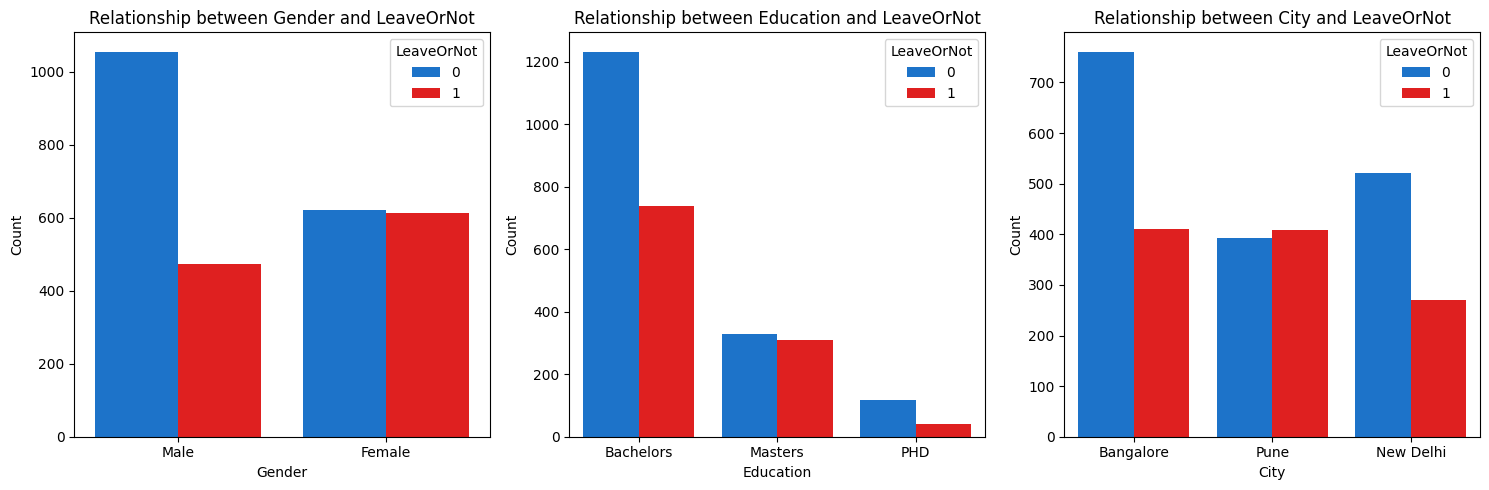

In [15]:
# Memilih fitur yang akan dianalisis
selected_features = ['Gender', 'Education', 'City']

# Membuat subplot untuk menampilkan hubungan antara fitur-fitur dan target class 'LeaveOrNot'
plt.figure(figsize=(15, 5))
for i, feature in enumerate(selected_features):
    plt.subplot(1, 3, i+1)  # 3 baris, 1 kolom, nomor subplot ke-i+1
    sns.countplot(data=df_1, x=feature, hue='LeaveOrNot', palette=['#0073E6', '#FF0000'])
    plt.title(f'Relationship between {feature} and LeaveOrNot')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

dari diagram di atas kita bisa dapatkan informasi bahwa :
- Dari kolom Gender : untuk male lebih banyak yang tetap bekerja dari pada yang memutuskan untuk berhenti bekerja, sedangkan pada female memang lebih banyak yang tetap bekerja tapi tingkat karyawan yang memutuskan untuk berhenti juga banyak hampir setara.
- Dari kolom Educaation : baik bachelor, Master dan PHD masih tetap yang memutuskan bekerja lebih banyak daripada yang memutuskan untuk berhenti.
- dari kolom kota : kota pune merupakan kota asal karyawan yang lebih banyak memutuskan untuk berhenti bekerja daripada tetap bekerja di perusahaan.

# v. Feature Engineering

Proses untuk mengembangkan dan memilih suatu fitur atau atribut (features) yang akan digunakan untuk melakukan analisis data atau dalam melakukan pembuatan sebuah model machine learning.
yang dilakukan pada tahap ini adalah : 
- Data spliting
- Missing Value Handling
- Outlier Handling
- Fitur Selection
- Split Numerical Columns dan Categorical Columns
- Cek Cardinality
- Fiture Scalling
- Feature Encoding
- Concate between numerical and categorical columns

### a. Data Spliting

### a.1 Membuat sample data inference

In [16]:
# menyimpan 1 data acak dari data asli untuk dijadikan inferensi data ke dalam variabel data_inf
data_inf = df_1.sample(1, random_state=40)
 
# hapus inferensi data dari df
df_1.drop(data_inf.index, inplace=True)

# reset indeks untuk data_inf dan df
df_1.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

data_inf.to_csv('data_inf.csv',index=False)

Sampel data ini kita ambil satu baris dari seluruh data untuk kemudian dijadikan sebagai bahan prediksi.

### a.2 Split between X (Faeture/Variables) and y (Target)

Memisahkan antara target dan variablel

In [17]:
# Pisahkan antara 'X' dan 'y'
X = df_1.drop(['LeaveOrNot'],axis=1)
y = df_1.LeaveOrNot
X.shape

(2763, 8)

In [18]:
# Tampilkan kolom dalam bentuk list
df_1.columns.tolist()

['Education',
 'JoiningYear',
 'City',
 'PaymentTier',
 'Age',
 'Gender',
 'EverBenched',
 'ExperienceInCurrentDomain',
 'LeaveOrNot']

Variable (X) ini berisi :
- Education',
- 'JoiningYear',
- 'City',
- 'PaymentTier',
- 'Age',
- 'Gender',
- 'EverBenched',
- 'ExperienceInCurrentDomain',


Data target (y) adalah kolom 'LeaveOrNot', kita akan menggunakan label ini sebagai target saat membangun model dalam melakukan analisis lebih lanjut.


### a.3 Split between Train-set and Test-set

In [19]:
# Memisahkan antara Train dan Test menggunakan 'train_test_split()'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)     #test size 0.2 artinya 20% biasanya digunakan 0,2-0.25dari seluruh data #random state harus di isi dengan nilai agar tidak berubah2 boleh dengan angka apapun

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)
X_train.head()

Train Size : (2072, 8)
Test Size : (691, 8)


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
737,Bachelors,2016,Bangalore,2,25,Male,No,3
1611,Bachelors,2014,Bangalore,3,36,Female,No,1
1783,Bachelors,2014,Pune,3,37,Male,No,1
2151,Bachelors,2017,New Delhi,2,31,Male,No,2
1532,Masters,2018,Bangalore,3,39,Male,No,3


Setelah dilakukan hasil Train Size adalah (2072, 8), dan Test Size = (691, 8)

### b. Missing Value Handling

Pada tahap ini kita cek apakah ada missing value jika ada handling jika ternyata tidak ada lanjutkan ke proses selanjutnya.

In [20]:
# Memeriksa nilai yang hilang dalam setiap kolom
missing_values = df_1.isnull().sum()

# Menampilkan jumlah nilai yang hilang dalam setiap kolom
missing_values

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

Data tidak memiliki missing value

### C. Outlier Handling

Pada bagian ini kita melakukan proses outlier handling dengan tahapan :
- Menentukan data distribusi normal atau tidak
- Menampilkan distribusi melalui diagram
- Memastikan nilai upper bounder dan lower bounder
- Handling fitur yang memiliki outlier

#### a. Cek Distribusi

Disisni akan kita cari tau mana kolom dengan distribusi normal dan skew.

In [21]:
#buat data frame baru yang berisi kolom numerical
categorical = ['Education', 'City', 'Gender', 'EverBenched',]
numerical = ['Age', 'JoiningYear', 'ExperienceInCurrentDomain']
ordinal = ['PaymentTier']
for i in numerical:
     print(f'Distribution of column  {[i]}          : ', X_train[i].skew())

Distribution of column  ['Age']          :  0.3836867213404765
Distribution of column  ['JoiningYear']          :  -0.14737764293658978
Distribution of column  ['ExperienceInCurrentDomain']          :  0.0671700642649548


Kolom Age, JoiningYear dan ExperienceInCurrentDomain merupakan kolom dengan distribusi normal.

### b. Menampilkan Diagram Distribusi

In [22]:
# membuat histogram dan boxplot.
# menggunakan kerangka data (df_num) dan variabel yang diinginkan sebagai argumen.

def diagnostic_plots(df_num, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_num[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_num[variable])
    plt.title('Boxplot')

    plt.show()
    print('Distribution of column            : ', df_num[variable].skew())


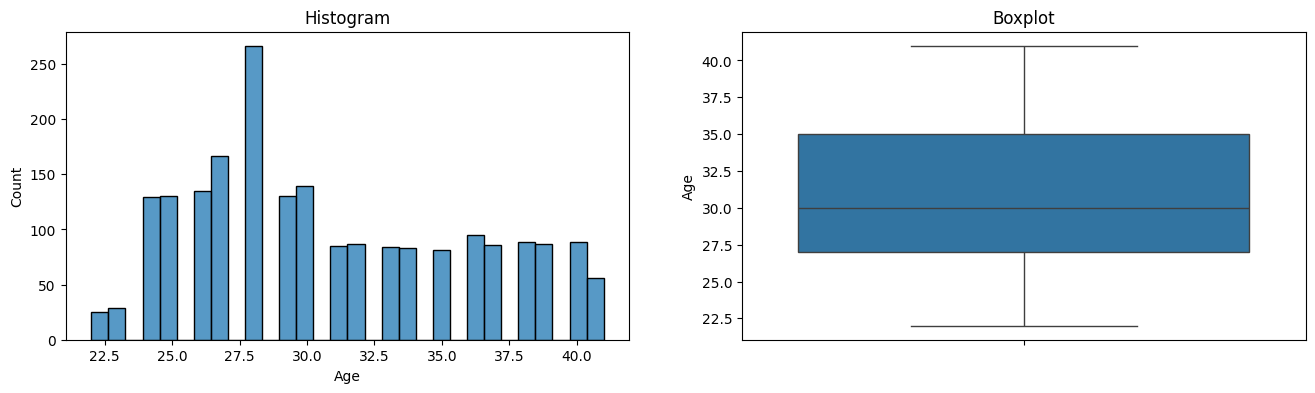

Distribution of column            :  0.3836867213404765


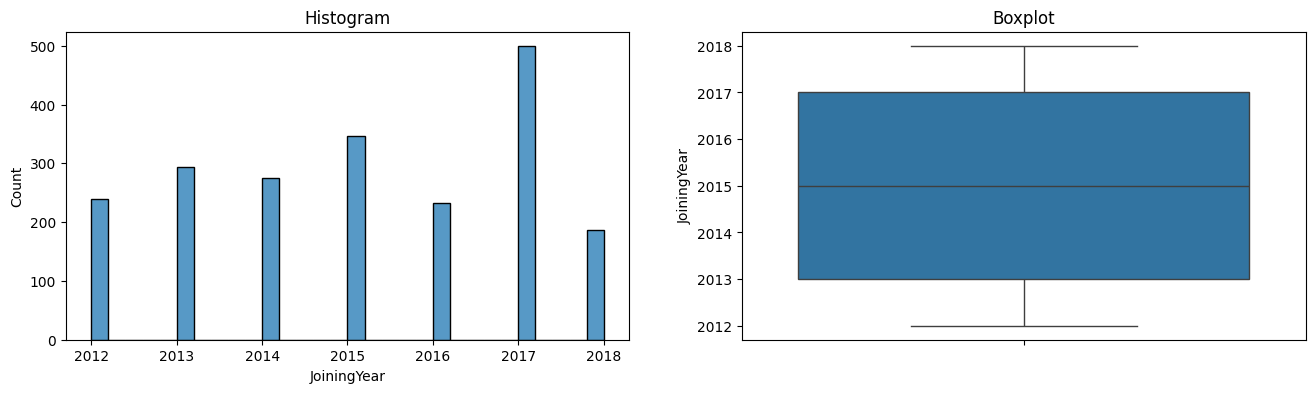

Distribution of column            :  -0.14737764293658978


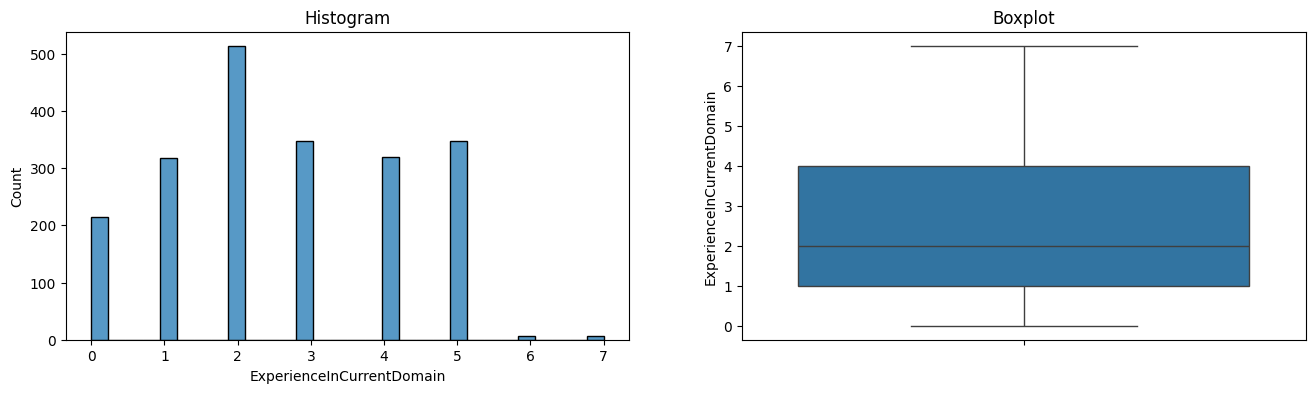

Distribution of column            :  0.0671700642649548


In [23]:
# Loop melalui setiap kolom dan memanggil diagnostic_plots
# Define the list of columns you want to plot

for column in numerical:
    diagnostic_plots(X_train, column)
    plt.show()  # Menampilkan setiap plot

Dapat dilihat dari diagram bahwa kolom 'Age', 'JoiningYear' dan 'ExperienceInCurrentDomain' berdistribusi normal dan tidak memiliki outlier.

#### c. Memastikan nilai upper bounder dan lower bounder

Memastikan nilai upper bound dan lower bound penting untuk menjaga validitas data, menghindari kesalahan perhitungan, dan mematuhi batasan yang ada dalam konteks tertentu. dalam hal ini memeriksa apakah data sudah di antara upper bounder atau belum.

In [24]:
# Berfungsi untuk mencari batas atas dan bawah variabel yang terdistribusi normal
def find_normal_boundaries(df_1, variable):
    # Hitung batas luar yang merupakan outlier untuk distribusi Gaussian
    upper_boundary = df_1[variable].mean() + 3 * df_1[variable].std()
    lower_boundary = df_1[variable].mean() - 3 * df_1[variable].std()

    return upper_boundary, lower_boundary

In [25]:
for i in numerical :
    # Kita hitung batas luar yang merupakan outlier untuk distribusi yang miring
    IQR = X_train[i].quantile(0.75) - X_train[i].quantile(0.25)
    # Jarak yang dilewati sebagai argumen, memberi kita pilihan untuk memperkirakan 1,5 kali atau 3 kali IQR untuk menghitung batasannya.
    lower_boundary_distance = X_train[i].quantile(0.25) - (IQR * 1.5)
    upper_boundary_distance = X_train[i].quantile(0.75) + (IQR * 1.5)

    print(f'upper boundary for {[i]} : {upper_boundary_distance}')
    print(f'lower boundary for {[i]} : {lower_boundary_distance}')
    print("---------------------------------------------------------")

upper boundary for ['Age'] : 47.0
lower boundary for ['Age'] : 15.0
---------------------------------------------------------
upper boundary for ['JoiningYear'] : 2023.0
lower boundary for ['JoiningYear'] : 2007.0
---------------------------------------------------------
upper boundary for ['ExperienceInCurrentDomain'] : 8.5
lower boundary for ['ExperienceInCurrentDomain'] : -3.5
---------------------------------------------------------


Dari data di atas data pada kolom 'age', 'ExperienceInCurrentDomain' dan 'ExperienceInCurrentDomain' masih dalam upper don lower bounder membuktikan data tidak memiliki outlier dan tidak perlu melakukan capping.

### D. Fitur Selection

Fitur selection disini menggunakan metode phik karena mampu membaca korelasi dari numerik dan categorikal.

interval columns not set, guessing: ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot']


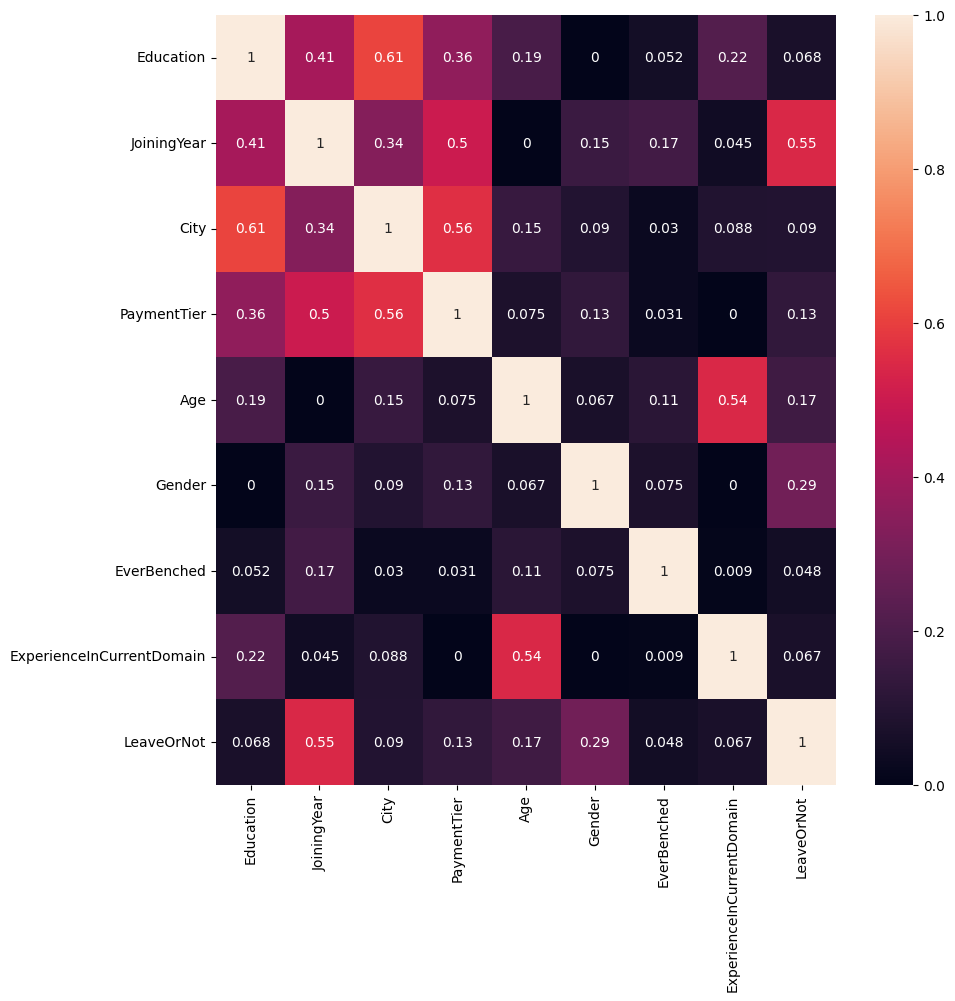

In [26]:
#menampilkan korelasi data
corr = df_1.phik_matrix()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

Dari hasil uji korelasi dengan menggunakan metode Phik di atas terlihat korelasi tidak ada yang lebih dari 0,5 sehingga di putuskan untuk mengambil korelasi > 0,1, sehingga di dapatkan fitur :
- 'JoiningYear',
- 'PaymentTier',
- 'Age'
- 'Gender'
- 'City'

Namun mempertimbangkan pengalaman bahwa kota tempat tinggal berpengaruh pada kenyamanan seorang bekerja hingga berbuntut pada keputusan seorang pegawai memilih untuk melanjutkan bekerja atau leave maka city akan di masukan pada fitur.

Setelah di dapatkan fitur yang di gunakan selanjutnya kita menghapus kolom dari X_train dan y_train yang tidak berpengaruh terhadap y label yaitu LeaveorNot.

In [27]:
# hapus kolom pada X_train
X_train = X_train.drop(['Education','EverBenched', 'ExperienceInCurrentDomain'],axis=1)
X_train.shape

(2072, 5)

In [28]:
# hapus kolom pada X_test
X_test = X_test.drop(['Education','EverBenched', 'ExperienceInCurrentDomain'],axis=1)
X_test.head()

,JoiningYear,City,PaymentTier,Age,Gender
981,2018,Bangalore,3,30,Female
955,2017,New Delhi,3,26,Female
543,2017,Bangalore,3,24,Male
2421,2014,Pune,3,32,Male
2191,2014,Bangalore,3,35,Male


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2072 entries, 737 to 1289
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   JoiningYear  2072 non-null   int64 
 1   City         2072 non-null   object
 2   PaymentTier  2072 non-null   int64 
 3   Age          2072 non-null   int64 
 4   Gender       2072 non-null   object
dtypes: int64(3), object(2)
memory usage: 97.1+ KB


Sudah fix fitur yang akan akan kita gunakan dalam memprediksi karyawan akan leave atau tidak, yaitu :
- 'JoiningYear',
- 'PaymentTier',
- 'Age'
- 'Gender'
- 'City'

### E. Split Numerical Columns dan Categorical Columns

In [30]:
# Inisialisasi list untuk kolom numerik dan kategorikal
num_col = ['Age', 'JoiningYear']
cat_col = ['City', 'Gender','PaymentTier']

# Menampilkan daftar kolom numerik
print('Numerical columns:',num_col)

# Menampilkan daftar kolom kategorikal
print('Categorical columns:',cat_col)


Numerical columns: ['Age', 'JoiningYear']
Categorical columns: ['City', 'Gender', 'PaymentTier']


Memisahkan x train

In [31]:
# Pisahkan train_set dan test_set berdasarkan jenis kolom
X_train_num = X_train[num_col]
X_test_num = X_test[num_col]

X_train_cat = X_train[cat_col]
X_test_cat = X_test[cat_col]

X_train_num.head()

,Age,JoiningYear
737,25,2016
1611,36,2014
1783,37,2014
2151,31,2017
1532,39,2018


In [32]:
# Tampilkan X_train
X_train_cat.head()

,City,Gender,PaymentTier
737,Bangalore,Male,2
1611,Bangalore,Female,3
1783,Pune,Male,3
2151,New Delhi,Male,2
1532,Bangalore,Male,3


Split trainset berhasil di jalankan

### F. Cek Cardinality

Melihat seberapa banyak jenis data pada kolo categorical.

In [33]:
#Show cardinality
pd.set_option('display.max_colwidth', None)
values = []
for col in X_train_cat.columns:
    values.append([col, X_train_cat[col].nunique(), X_train_cat[col].unique()])

pd.DataFrame(values, columns=['Nama kolom', 'jumlah nilai unique', 'nilai unique'])

,Nama kolom,jumlah nilai unique,nilai unique
0,City,3,"[Bangalore, Pune, New Delhi]"
1,Gender,2,"[Male, Female]"
2,PaymentTier,3,"[2, 3, 1]"


Data merupakan low cardinality

### g. Membuat Pipeline fitur Encoding dan Scaling

- Encoding menggunakan OneHotEncoder dengan mempertimbangakn kesederhanaan, kompatibilitas dengan berbagai algoritma, dan kemampuannya untuk menjaga keunikan setiap kategori dalam data kategoris.
- Untuk mengubah data ke dalam rentang [0, 1] mempermudah perbandingan antar-variabel dan memungkinkan algoritma yang sensitif terhadap skala, seperti beberapa algoritma machine learning, bekerja lebih baik untuk itu scaling menggunakan MinMaxScaler.

In [34]:
# Definiskan encoder dan scaler
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = MinMaxScaler()

# list kolom numerical dan categorical
num_col = ['Age']
cat_col = ['JoiningYear', 'City', 'Gender']
ord_col = ['PaymentTier']

#Buat transformer
transformer = ColumnTransformer(
    [('scaler', scaler, num_col),
     ('encoder', encoder, cat_col,),
     ('passthrough', 'passthrough', ord_col)],
     remainder='drop' )

In [35]:
transformer

ColumnTransformer(transformers=[('scaler', MinMaxScaler(), ['Age']),
                                ('encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['JoiningYear', 'City', 'Gender']),
                                ('passthrough', 'passthrough',
                                 ['PaymentTier'])])

Transformer berhasil dibuat.

# vi. Model Definition

Dalam bagian ini menggunakan 7 model sebelum akhirnya di seleksi model mana yang paling baik di gunakan dengan pengujian matrics recall.

In [36]:
# Model definition
log_model = LogisticRegression(max_iter=1000000)
svm_model = SVC()
dt_model = DecisionTreeClassifier(random_state=10)
rf_model = RandomForestClassifier(random_state=10)
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
ada_model = AdaBoostClassifier()

Define model menggunakan pipeline

In [37]:
# Pipeline model untuk Logistic Regression
pipe_logreg = Pipeline([
    ('transformer', transformer),  # Ganti dengan transformer Anda
    ('model', log_model)
])

# Pipeline model untuk Support Vector Machine (SVM)
pipe_svm = Pipeline([
    ('transformer', transformer),  # Ganti dengan transformer Anda
    ('model', svm_model)
])

# Pipeline model untuk Decision Tree
pipe_dt = Pipeline([
    ('transformer', transformer),  # Ganti dengan transformer Anda
    ('model', dt_model)
])

# Pipeline model untuk Random Forest
pipe_rf = Pipeline([
    ('transformer', transformer),  # Ganti dengan transformer Anda
    ('model', rf_model)
])

# Pipeline model untuk K-Nearest Neighbors (KNN)
pipe_knn = Pipeline([
    ('transformer', transformer),  # Ganti dengan transformer Anda
    ('model', knn_model)
])

# Pipeline model untuk Naive Bayes (GaussianNB)
pipe_nb = Pipeline([
    ('transformer', transformer),  # Ganti dengan transformer Anda
    ('model', nb_model)
])

# Pipeline model untuk AdaBoost
pipe_ada = Pipeline([
    ('transformer', transformer),  # Ganti dengan transformer Anda
    ('model', ada_model)
])

# vii. Model Training

Pelatihan model (model training) ini hanya berisi code untuk melatih model dan output yang dihasilkan. Pelatihan model ini adalah langkah kunci dalam membangun model-machine learning yang efektif, karena model tersebut belajar dari data pelatihan untuk membuat prediksi yang sesuai.

## a. Cross Validation


 Digunakan untuk mengevaluasi kinerja model secara objektif dan meminimalkan risiko overfitting. Ini melibatkan pembagian data menjadi set pelatihan dan pengujian yang berbeda-beda untuk mengukur sejauh mana model mampu menggeneralisasi pada data yang belum pernah dilihat sebelumnya.

In [38]:
# define skfold
skfold=StratifiedKFold(n_splits=5)

In [39]:
# Define Cross Validation untuk setiap model
cv_log_model = cross_val_score(pipe_logreg, X_train, y_train, cv = skfold, scoring = 'recall')
cv_svm_model = cross_val_score(pipe_svm, X_train, y_train, cv = skfold, scoring = 'recall')
cv_dt_model = cross_val_score(pipe_dt, X_train, y_train, cv = skfold, scoring = 'recall')
cv_rf_model = cross_val_score(pipe_rf, X_train, y_train, cv = skfold, scoring = 'recall')
cv_knn_model = cross_val_score(pipe_knn, X_train, y_train, cv = skfold, scoring = 'recall')
cv_nb_model = cross_val_score(pipe_nb, X_train, y_train, cv = skfold, scoring = 'recall')
cv_ada_model = cross_val_score(pipe_ada, X_train, y_train, cv = skfold, scoring = 'recall')

In [40]:
# Finding Best model based on cros_val_score (mean)
name_model = []
cv_scores = 0
for cv,name in zip ([cv_log_model, cv_svm_model, cv_dt_model, cv_rf_model, cv_knn_model, cv_nb_model, cv_ada_model], 
                    ['log_model', 'svm_model', 'dt_model', 'rf_model', 'knn_model', 'nb_model', 'ada_model']):
    print(name)
    print('recall - All - Cross Validation :', cv)
    print('recall - Mean - Cross Validation :', cv.mean())
    print('recall - Std - Cross Validation :', cv.std())
    print('recall - Range of Test Set :', (cv.mean()-cv.std()), '-', (cv.mean()+cv.std()))
    print('-'*50)

    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else :
        pass
    
print('Best Model :', name_model)
print('Cross Val mean From Best Model :', cv_scores)

log_model
recall - All - Cross Validation : [0.54491018 0.50299401 0.48502994 0.50898204 0.56024096]
recall - Mean - Cross Validation : 0.5204314263040184
recall - Std - Cross Validation : 0.027829573577237154
recall - Range of Test Set : 0.49260185272678125 - 0.5482609998812555
--------------------------------------------------
svm_model
recall - All - Cross Validation : [0.53892216 0.50299401 0.49700599 0.49101796 0.54216867]
recall - Mean - Cross Validation : 0.5144217588918549
recall - Std - Cross Validation : 0.021687788575454756
recall - Range of Test Set : 0.49273397031640015 - 0.5361095474673097
--------------------------------------------------
dt_model
recall - All - Cross Validation : [0.56287425 0.46706587 0.49101796 0.44311377 0.54216867]
recall - Mean - Cross Validation : 0.501248106197244
recall - Std - Cross Validation : 0.044999903708137515
recall - Range of Test Set : 0.4562482024891065 - 0.5462480099053816
--------------------------------------------------
rf_model
r

Model terbaik pada project ini adalah knn_model.

# b. Baseline Model

Model sederhana yang digunakan sebagai dasar perbandingan atau acuan dalam pengembangan model machine learning yang lebih kompleks. Setelah mendapatakan model terbaik maka kita gunakan.

In [41]:
# Baseline Model menggunakan Random Forest Algorithm
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['Age']),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['JoiningYear', 'City',
                                                   'Gender']),
                                                 ('passthrough', 'passthrough',
                                                  ['PaymentTier'])])),
                ('model', KNeighborsClassifier())])

Recall Score - test Set  :  0.5708661417322834 

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.79      0.77       437
           1       0.61      0.57      0.59       254

    accuracy                           0.71       691
   macro avg       0.68      0.68      0.68       691
weighted avg       0.70      0.71      0.71       691
 

Confusion Matrix      : 


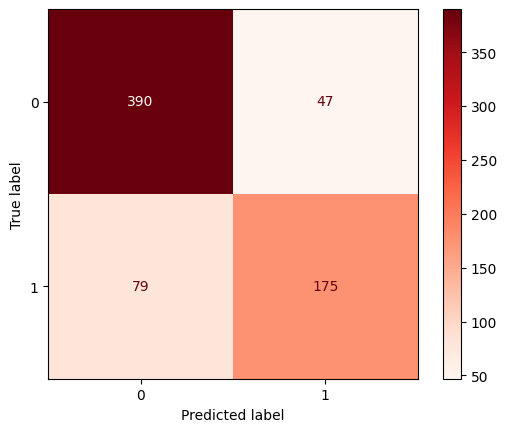

In [42]:
# Check Performance Model against test-Set
y_pred_test = pipe_knn.predict(X_test)

print('Recall Score - test Set  : ', recall_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_knn.fit(X_test, y_test)
, X_test, y_test, cmap='Reds'))

Hasil recall sebesar 0.57 berarti bahwa model ini mampu mengidentifikasi sekitar 57% dari semua instance positif yang sebenarnya (true positives) dalam data pengujian. Dengan kata lain, sekitar 57% dari semua sampel yang sebenarnya termasuk dalam kategori positif telah ditemukan oleh model ini.

# c. Hyper Parameter Tuning

Hyperparameter dari model knn dilakukan dengan grid search dengan Keunggulan nya yaitu kemampuannya untuk secara eksploratif mencari kombinasi parameter optimal secara sistematis, memungkinkan identifikasi model terbaik dalam ruang parameter yang telah ditentukan.

In [43]:
# Define Hyperparameters for KNN
param_grid = {
    'model__n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'model__weights': ['uniform', 'distance'],  # Weighting method for neighbors
    'model__p': [1, 2]  # Distance metric (1 for Manhattan, 2 for Euclidean)
}
param_grid

{'model__n_neighbors': [3, 5, 7, 9],
 'model__weights': ['uniform', 'distance'],
 'model__p': [1, 2]}

Didapatkan kombinasi terbaik.

In [44]:
# Train with Random Search
knn_grid = GridSearchCV(estimator=pipe_knn,
                                 param_grid=param_grid,
                                 cv=5,
                                 n_jobs=-1,
                                 scoring='recall')
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         MinMaxScaler(),
                                                                         ['Age']),
                                                                        ('encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['JoiningYear',
                                                                          'City',
                                                                          'Gender']),
                                                                        ('passthrough',
                                                                         'passthrough',
                                                                         ['PaymentTier'])])),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__n_neighbors': [3, 5, 7, 9], 'model__p': [1, 2],
                         'model__weights': ['uniform', 'distance']},
             scoring='recall')

Cek parameter terbaik

In [45]:
# Get Best Hyperparameters
knn_grid.best_params_

{'model__n_neighbors': 5, 'model__p': 1, 'model__weights': 'uniform'}

Masukan parameter terbaik ke model

In [46]:
# Get Best Estimator
knn_grid_best = knn_grid.best_estimator_

In [47]:
knn_grid_best

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['Age']),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['JoiningYear', 'City',
                                                   'Gender']),
                                                 ('passthrough', 'passthrough',
                                                  ['PaymentTier'])])),
                ('model', KNeighborsClassifier(p=1))])

# viii. Model Evaluation

Evaluasi model membantu dalam mengukur sejauh mana model yang dikembangkan dapat memprediksi dengan benar atau menghasilkan hasil yang sesuai dengan data yang belum pernah dilihat sebelumnya. Ini memberikan pandangan yang obyektif tentang apakah model tersebut berguna atau tidak

Recall Score - train Set   :  0.6510791366906474 

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84      1238
           1       0.80      0.65      0.72       834

    accuracy                           0.79      2072
   macro avg       0.79      0.77      0.78      2072
weighted avg       0.79      0.79      0.79      2072
 

Confusion Matrix      : 


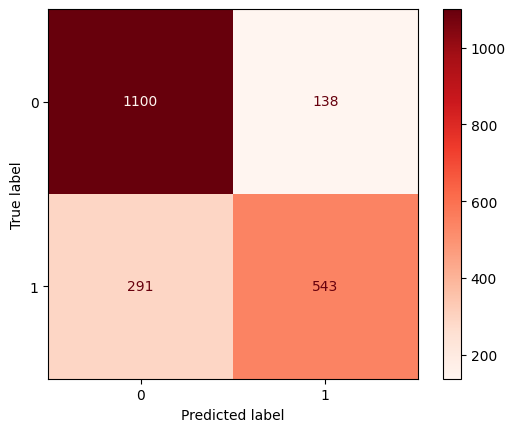

In [48]:
# Check Performance Model against train-Set

y_pred_train = knn_grid_best.predict(X_train)

print('Recall Score - train Set   : ', recall_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_grid_best, X_train, y_train, cmap='Reds'))

Recall Score - Test Set   :  0.5708661417322834 

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       437
           1       0.61      0.57      0.59       254

    accuracy                           0.71       691
   macro avg       0.68      0.68      0.68       691
weighted avg       0.70      0.71      0.70       691
 

Confusion Matrix      : 


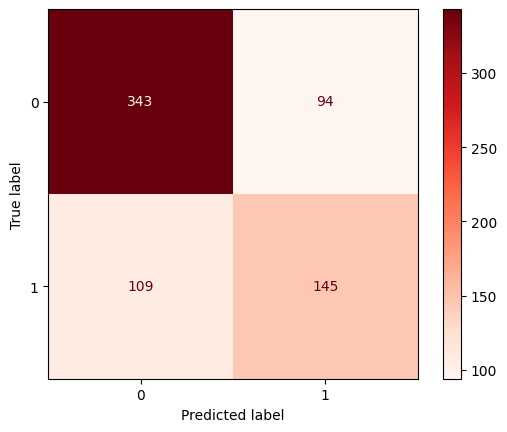

In [49]:
# Check Performance Model against Test-Set

y_pred_test = knn_grid_best.predict(X_test)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_grid_best, X_test, y_test, cmap='Reds'))

Recall score train = 0.65  : Ini berarti bahwa pada dataset pelatihan, model mampu mengidentifikasi dengan benar 65% dari semua kasus positif (klasifikasi 1). Ini adalah kinerja model pada data yang digunakan untuk pelatihan.

Recall Score Test = 0.57: Ini berarti bahwa pada dataset pengujian, model hanya mampu mengidentifikasi dengan benar 57% dari semua kasus positif (klasifikasi 1). Ini adalah kinerja model pada data yang belum pernah dilihat sebelumnya (data pengujian).

Perbedaan antara recall score pada data train dan data test bisa mengindikasikan underfiting. Jika model memiliki recall tes yang lebih tinggi pada data pelatihan daripada pada data pengujian, maka model tersebut mungkin telah "memorakannya" dengan baik pada data pelatihan, tetapi mungkin tidak generalisasi dengan baik pada data yang belum pernah dilihat sebelumnya. Hal ini bisa menjadi tanda bahwa model perlu penyesuaian agar lebih baik dalam menggeneralisasi pada data baru.

In [50]:
all_reports = {}

def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy,0.706223
test - f1_score,0.588235
test - precision,0.606695
test - recall,0.570866
train - accuracy,0.792954
train - f1_score,0.716832
train - precision,0.797357
train - recall,0.651079


Test Recall yang Rendah: Recall pada data pengujian adalah 57.1%, yang menunjukkan bahwa model memiliki kesulitan dalam mengidentifikasi positif sejati.

**Membuat perbandingan aktual dan prediksi pada X_test**

In [51]:
perbandingan = pd.DataFrame({'aktual': y_test,
                             'prediksi': y_pred_test})

perbandingan

,aktual,prediksi
981,1,1
955,0,0
543,1,0
2421,0,0
2191,0,0
...,...,...
1928,0,1
2187,0,0
2273,0,0
2360,0,0


**Membandingkan berapa jumlah prediksi yang sama dengan aktual dan prediksi yang tidak sama dengan aktual**

In [52]:
sesuai_prediksi = (perbandingan['aktual'] == perbandingan['prediksi']).sum()
tidak_sesuai_prediksi = (perbandingan['aktual'] != perbandingan['prediksi']).sum()

print(f'jumlah prediksi sama dengan aktual = ', sesuai_prediksi)
print(f'jumlah prediksi tidak sama dengan aktual = ', tidak_sesuai_prediksi)


jumlah prediksi sama dengan aktual =  488
jumlah prediksi tidak sama dengan aktual =  203


Dari Hasil Prediksi dengan menggunakan x_test sebagai data dalam melakukan prediksi di dapatkan bahwa :
- Jumlah prediksi sama dengan aktual =  488 = 70.62% 
- Jumlah prediksi tidak sama dengan aktual =  203 = 29.38%

In [53]:
# Menghitung confusion matrix
cm = confusion_matrix(perbandingan['aktual'], perbandingan['prediksi'])

# Menampilkan hasil confusion matrix
print("Confusion Matrics:")
print(cm)

# Menghitung True Positives, True Negatives, False Positives, dan False Negatives
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

Confusion Matrics:
[[343  94]
 [109 145]]
True Positives (TP): 145
True Negatives (TN): 343
False Positives (FP): 94
False Negatives (FN): 109


Artinya : 
- True Positives (TP): Jumlah karyawan yang diprediksi sebagai "akan berhenti" dan benar-benar "berhenti" adalah 145.
- True Negatives (TN): Jumlah karyawan yang diprediksi sebagai "akan tetap bekerja" dan benar-benar "tetap bekerja" adalah 343.
- False Positives (FP): Jumlah karyawan yang diprediksi sebagai "akan berhenti" tetapi sebenarnya "tetap bekerja" adalah 94.
- False Negatives (FN): Jumlah karyawan yang diprediksi sebagai "akan tetap bekerja" tetapi sebenarnya "berhenti" adalah 109.

Dengan data di atas kita dapat menganalisis seberapa baik model ini dalam memprediksi karyawan yang akan berhenti (positif) dan karyawan yang akan - tetap bekerja (negatif). False Positives dan False Negatives adalah bagian penting dari evaluasi model dimana model ini hanya mampu mengidentifikasi secara benar sebanyak 70.02%, karena mereka menunjukkan di mana model Anda mungkin membuat kesalahan dalam prediksi 29,82%.

# ix. Model Saving



In [54]:
knn_grid_best

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['Age']),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['JoiningYear', 'City',
                                                   'Gender']),
                                                 ('passthrough', 'passthrough',
                                                  ['PaymentTier'])])),
                ('model', KNeighborsClassifier(p=1))])

 Proses penyimpanan model penting karena melatih model bisa memakan waktu dan sumber daya yang berharga, dan dengan menyimpan model, Anda dapat dengan cepat menerapkannya pada data baru.

In [55]:
#simpan file

with open('pipe_knn.pkl', 'wb') as file_1: #wb = write binnary
    pickle.dump(knn_grid_best,file_1)

# x. Model Inference

Model inference dibuat di notebook berbeda dengan nama **Employee_inf.ipynb**

# xi. Pengambilan Kesimpulan

Data yang kita teliti berasal dari data set [Employee Future Prediction]('https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction') dimana data ini terdiri dari 9 kolom, dengan rincian : Bertipe Integer(5) 10 kolom , Object 4 kolom, Memiliki 4.653 baris. namun dari data ini masih terdapat data duplikat sehingga setelah di drop semua duplikat jumlah data yang kita jadikan penelitian adalah Data terdiri dari 9 kolom, bertipe Integer(5) 10 kolom , Object 4 kolom dan memiliki 2.764 baris.

Dari hasil eksplorasi data sederhana didapatkan kan informasi dari masing masing kolom sebagai berikut :
1. Kolom LeaveOrNot :Kecenderungan pegawai tetap bekerja walau tingkat berhenti karyawan pun besar, persebaran data antara city dan age persebarannya merata.
2. Dari kolom city terlihat persebaran kota tempat asal karyawan :
- 42.37 % karyawan berasal dari Bangalore
- 28.98 % karyawan berasal dari Pune
- 28.65 % karyawan berasal dari New Delhi
3. Kolom Education : karyawan paling banyak dari lulusan Bachelor,
4. Kolom JoinYear : mayoritas karyawan mulai bekerja pada tahun 2017,
5. Kolom PaymenTier : paymenttier tertinggi di angka 3 bulan.
6. Kolom Gender : mayoritas karyawan adala male (pria)
7. Kolom Age : persebaran usia pegawai terlihat merata, usia 28 tahun adalah usia terbanyak dari karyawan.
8. Kolom EverBench : didominasi oleh karyawa yang tidak pernah keluar dari prusahaan. 

Model yang digunakan pada penelitian ini di ambil dari model Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, K-Nearest Neighbors, Gaussian Naive Bayes, dan AdaBoost dari ke 7 model ini di ambil satu yang terbaik yaitu knn dengan metrics Recall.

Dari Hasil Prediksi dengan menggunakan x_test sebagai data dalam melakukan prediksi di dapatkan bahwa :
- Jumlah prediksi sama dengan aktual =  488 = 70.62% 
- Jumlah prediksi tidak sama dengan aktual =  203 = 29.38%

Dengan rincian Confusion Metrics:
 
| 343 | 94 |
------ | ------
| 109 | 145 |

True Positives (TP): 145
True Negatives (TN): 343
False Positives (FP): 94
False Negatives (FN): 109

Dari data di atas kita dapatkan informasi sebagai berikut:
- True Positives (TP): Jumlah karyawan yang diprediksi sebagai "akan berhenti" dan benar-benar "berhenti" adalah 145.
- True Negatives (TN): Jumlah karyawan yang diprediksi sebagai "akan tetap bekerja" dan benar-benar "tetap bekerja" adalah 343.
- False Positives (FP): Jumlah karyawan yang diprediksi sebagai "akan berhenti" tetapi sebenarnya "tetap bekerja" adalah 94.
- False Negatives (FN): Jumlah karyawan yang diprediksi sebagai "akan tetap bekerja" tetapi sebenarnya "berhenti" adalah 109.

Dari hasil penelitian di atas maka dapat kita tari kelemahan dan kelebihan model :
1.  Kelebihan Model:
    - High True Positives (TP): Model memiliki jumlah True Positives (145) yang relatif tinggi. Ini berarti model cukup baik dalam mengidentifikasi karyawan yang akan benar-benar berhenti.
    - High True Negatives (TN): Jumlah True Negatives (343) yang cukup tinggi menunjukkan bahwa model juga cukup baik dalam mengidentifikasi karyawan yang akan benar-benar tetap bekerja.

2. Kelemahan Model:

    - False Positives (FP): Model menghasilkan sejumlah False Positives (94), yang artinya sebagian karyawan yang diprediksi akan berhenti ternyata tetap bekerja. Hal ini dapat mengakibatkan biaya tambahan atau kebingungan dalam manajemen sumber daya manusia.

    - False Negatives (FN): Jumlah False Negatives (109) juga cukup signifikan, yang berarti sebagian karyawan yang seharusnya diprediksi akan berhenti ternyata tidak terdeteksi. Ini dapat mengakibatkan kehilangan bakat yang berharga dan potensi masalah dalam pengelolaan karyawan.

Mengingat masih banyak kelemahan pada model ini saya rekomendasikan pada peneliti yang akan melakukan modeling pada data set ini sbb :
- Menyesuaikan threshold prediksi untuk mengurangi False Positives atau False Negatives, tergantung pada tujuan bisnis Anda.
- Memperkuat perangkat pengukuran yang lebih cocok untuk masalah klasifikasi, seperti Precision, Accuracy, atau F1 Score.
- Melakukan analisis lebih lanjut terhadap data atau menggali lebih dalam ke dalam faktor-faktor yang memengaruhi keputusan karyawan untuk berhenti atau tetap bekerja.

Dari hasil penelitian menjelaskan begitu banyak karyawan yang keluar dari perusahaan untuk itu diperlukan pencegahan agar perusahaan stabil dalam operasional, dengan langkah-langkah sebagai berikut : 
- Analisis Karyawan dengan Risiko Tinggi : Identifikasi karyawan yang memiliki risiko tinggi untuk berhenti berdasarkan prediksi model. Fokuskan perhatian pada karyawan-karyawan ini.

- Kustomisasi Pendekatan : Kenali bahwa setiap karyawan unik. Sesuaikan pendekatan Anda dalam merawat karyawan yang berisiko tinggi untuk berhenti. Cobalah untuk memahami alasan individu di balik keinginan mereka untuk berhenti dan coba temukan solusi yang sesuai.

- Implementasikan Program Retensi : Berdasarkan analisis model, implementasikan program-program retensi yang dapat membantu mempertahankan karyawan. Ini bisa termasuk peningkatan lingkungan kerja, program pelatihan, atau pengembangan jenjang karier.

- Evaluasi Kebijakan dan Budaya Perusahaan : Tinjau kebijakan dan budaya perusahaan Anda. Pastikan bahwa perusahaan menciptakan lingkungan yang mendukung karyawan dan memotivasi mereka untuk tetap bekerja.

- Penggunaan Data untuk Pengambilan Keputusan : Terus gunakan data untuk pengambilan keputusan yang lebih baik. Model ini dapat memberikan wawasan berharga yang dapat membantu Anda mengidentifikasi masalah dan peluang dalam organisasi.

- Evaluasi Model Secara Berkala : Terus evaluasi kinerja model Anda. Pastikan bahwa model tetap akurat dan mempertimbangkan penyesuaian jika diperlukan.

- Pertahankan Karyawan Berharga : Identifikasi karyawan yang memiliki dampak positif besar pada perusahaan dan lakukan upaya untuk menjaga mereka tetap berada di perusahaan.

- Feedback dari Karyawan : Berikan kesempatan bagi karyawan untuk memberikan masukan dan umpan balik tentang lingkungan kerja, kebijakan perusahaan, dan alasan mereka berhenti. Ini dapat memberikan wawasan yang berharga.

- Komunikasi Terbuka : Fasilitasi komunikasi terbuka antara manajemen dan karyawan. Berikan kesempatan untuk karyawan untuk menyampaikan kekhawatiran mereka.

- Perhatian Terhadap Keseimbangan Kerja-Hidup : Pastikan bahwa karyawan memiliki keseimbangan kerja-hidup yang sehat. Ini dapat membantu meningkatkan kepuasan dan retensi karyawan.

- Dengan menggunakan hasil model ini sebagai alat bantu, perusahaan dapat mengambil tindakan yang lebih cerdas dalam manajemen sumber daya manusia dan meningkatkan retensi karyawan.